# Rotacionais e Gradientes
## Nícolas André da Costa Morazotti

Podemos entender o que ocorre ao calcularmos o rotacional de um campo da
seguinte maneira: suponha um campo $\mathbf A = xy(\hat x+\hat y+\hat
z)$. Primeiramente, definimos o campo:

In [27]:
import numpy as np
from sympy import *
from sympy.physics.vector import ReferenceFrame, curl, divergence, gradient, Vector

S = ReferenceFrame('S')
A = (S[0]*S[1])*(S.x+S.y+S.z)
vars = [S[0],S[1],S[2]]
A

S_x*S_y*S.x + S_x*S_y*S.y + S_x*S_y*S.z

Aqui, escrevemos a variável $x_i$ (por exemplo, x) como $S_i$: $S_x$ representa a coordenada $x$ e assim por diante. O versor $\hat{\mathbf{s}}_x$ representa $\hat x$.
Veja que podemos calcular o rotacional de $\mathbf A$ referente ao
referencial $S$ com ``curl(A,S)``:
    

In [3]:
curl(A,S)

S_x*S.x - S_y*S.y + (-S_x + S_y)*S.z

Desejamos plotar o campo $\mathbf A$ e seu rotacional num plano $z=0$. 

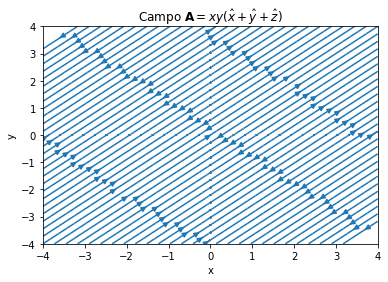

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(dpi=300)
%matplotlib Inline
X,Y = np.mgrid[-4:4:100j,-4:4:100j]
U = lambdify(vars,A.dot(S.x),modules='numpy')
V = lambdify(vars,A.dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'Campo $\mathbf{A} = xy(\hat{x}+\hat{y}+\hat{z})$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

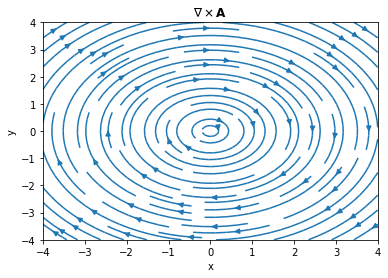

In [5]:
U = lambdify(vars,curl(A,S).dot(S.x),modules='numpy')
V = lambdify(vars,curl(A,S).dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'$\nabla\times\mathbf{A}$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

Se tivéssemos definido o campo $\mathbf A$ como um gradiente de um campo
escalar $f=xy$,

In [6]:
f = S[0]*S[1]
A = gradient(f,S)
A

S_y*S.x + S_x*S.y

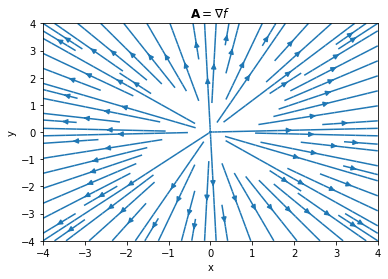

In [7]:
U = lambdify(vars,A.dot(S.x),modules='numpy')
V = lambdify(vars,A.dot(S.y),modules='numpy')
plt.streamplot(Y,X, U(X,Y,0), V(X,Y,0))
plt.title(r'$\mathbf{A}=\nabla f$')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()

De tal modo que $\nabla\times A=0$:

In [8]:
curl(A,S)

0

Por exemplo, podemos ver como o campo de dipolo (aproximado) se distingue do campo real:

In [29]:
from sympy.abc import q,d
p = q*d*S.z
r = sum([S[i]*versor for i, versor in enumerate(S)])
dipole_potential = p.dot(r)/(r.magnitude()**3)
electric_potential = q/((r-d*S.z).magnitude())-q/((r+d*S.z).magnitude())
dipole_field = -gradient(dipole_potential, S)
electric_field = -gradient(electric_potential,S)

Graficando os campos elétricos, tanto o aproximado quanto o real, a uma grande distância relativa à distância de dipolo, no plano X, temos

In [50]:
Z,Y = np.mgrid[-1:1:100j,-1:1:100j]
vars = [S[0],S[1],S[2],q,d]
Ey_approx = lambdify(vars,dipole_field.dot(S.y))
Ez_approx = lambdify(vars,dipole_field.dot(S.z))
Ey_real = lambdify(vars,electric_field.dot(S.y))
Ez_real = lambdify(vars,electric_field.dot(S.z))

Text(0, 0.5, 'z')

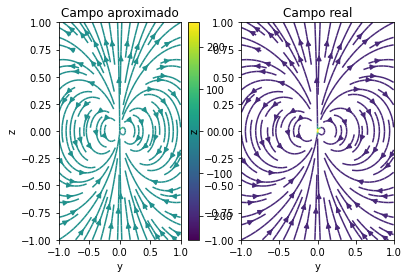

In [51]:
plt.figure(0)
plt.subplot(1,2,1)
plt.streamplot(Y,Z,Ey_approx(0,Y,Z,1,5e-4),Ez_approx(0,Y,Z,1,5e-4),color=Ey_approx(0,Y,Z,1,5e-4))
plt.colorbar(strm.lines)
plt.title("Campo aproximado")
plt.xlabel("y")
plt.ylabel("z")
plt.subplot(1,2,2)
plt.streamplot(Y,Z,Ey_real(0,Y,Z,1,5e-4),Ez_real(0,Y,Z,1,5e-4),color=Ez_real(0,Y,Z,1,5e-4))
plt.title("Campo real")
plt.xlabel("y")
plt.ylabel("z")

Agora, quando olhamos próximos do dipolo:

Text(0, 0.5, 'z')

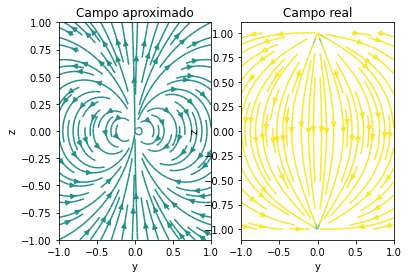

In [53]:
plt.figure(1)
plt.subplot(1,2,1)
plt.streamplot(Y,Z,Ey_approx(0,Y,Z,1,1),Ez_approx(0,Y,Z,1,1),color=Ey_approx(0,Y,Z,1,1))
plt.title("Campo aproximado")
plt.xlabel("y")
plt.ylabel("z")
plt.subplot(1,2,2)
plt.streamplot(Y,Z,Ey_real(0,Y,Z,1,1),Ez_real(0,Y,Z,1,1),color=Ez_real(0,Y,Z,1,1))
plt.title("Campo real")
plt.xlabel("y")
plt.ylabel("z")